# Business Understanding

This data set includes data of passengers in titanic ship and whether they will survive or not which depends on various other independent features

# Data Mining

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
print("Number of rows in dataset:",data.shape[0])
print("Number of columns in dataset:",data.shape[1])

Number of rows in dataset: 891
Number of columns in dataset: 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Cleaning

In [8]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [10]:
#more than 77% of data is missing in cabin column so droping it
data.drop('Cabin',axis=1,inplace=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
#0.2% data missing so filling with mode value
data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [13]:
data.Embarked=data.Embarked.fillna("S")

In [14]:
data.Embarked.isnull().sum()

0

In [15]:
#filling 20 percent null values with mean value
for dataset in data:
    mean=data['Age'].mean()
    std=data['Age'].std()
    sizeofnull=data['Age'].isnull().sum()
    randage=np.random.randint(mean-std,mean+std,size=sizeofnull)
    age_copied=data['Age'].copy()
    age_copied[np.isnan(age_copied)]=randage
    data['Age']=age_copied
    data['Age']=data['Age'].astype(int)

In [16]:
data.Age.isnull().sum()

0

# Explaratory Data Analysis

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [18]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

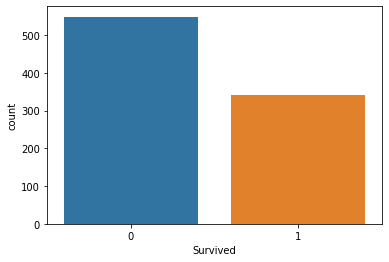

In [19]:
sns.countplot(x=data['Survived'])

In [20]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

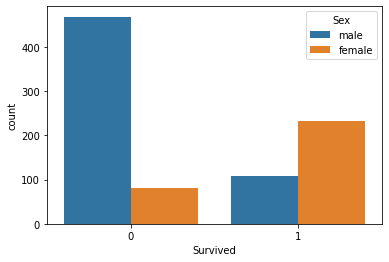

In [22]:
sns.countplot(x='Survived',hue='Sex',data=data)

In [23]:
data[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.776655,13.536408,0.0,21.0,29.0,38.0,80.0


In [24]:
data[['Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [25]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

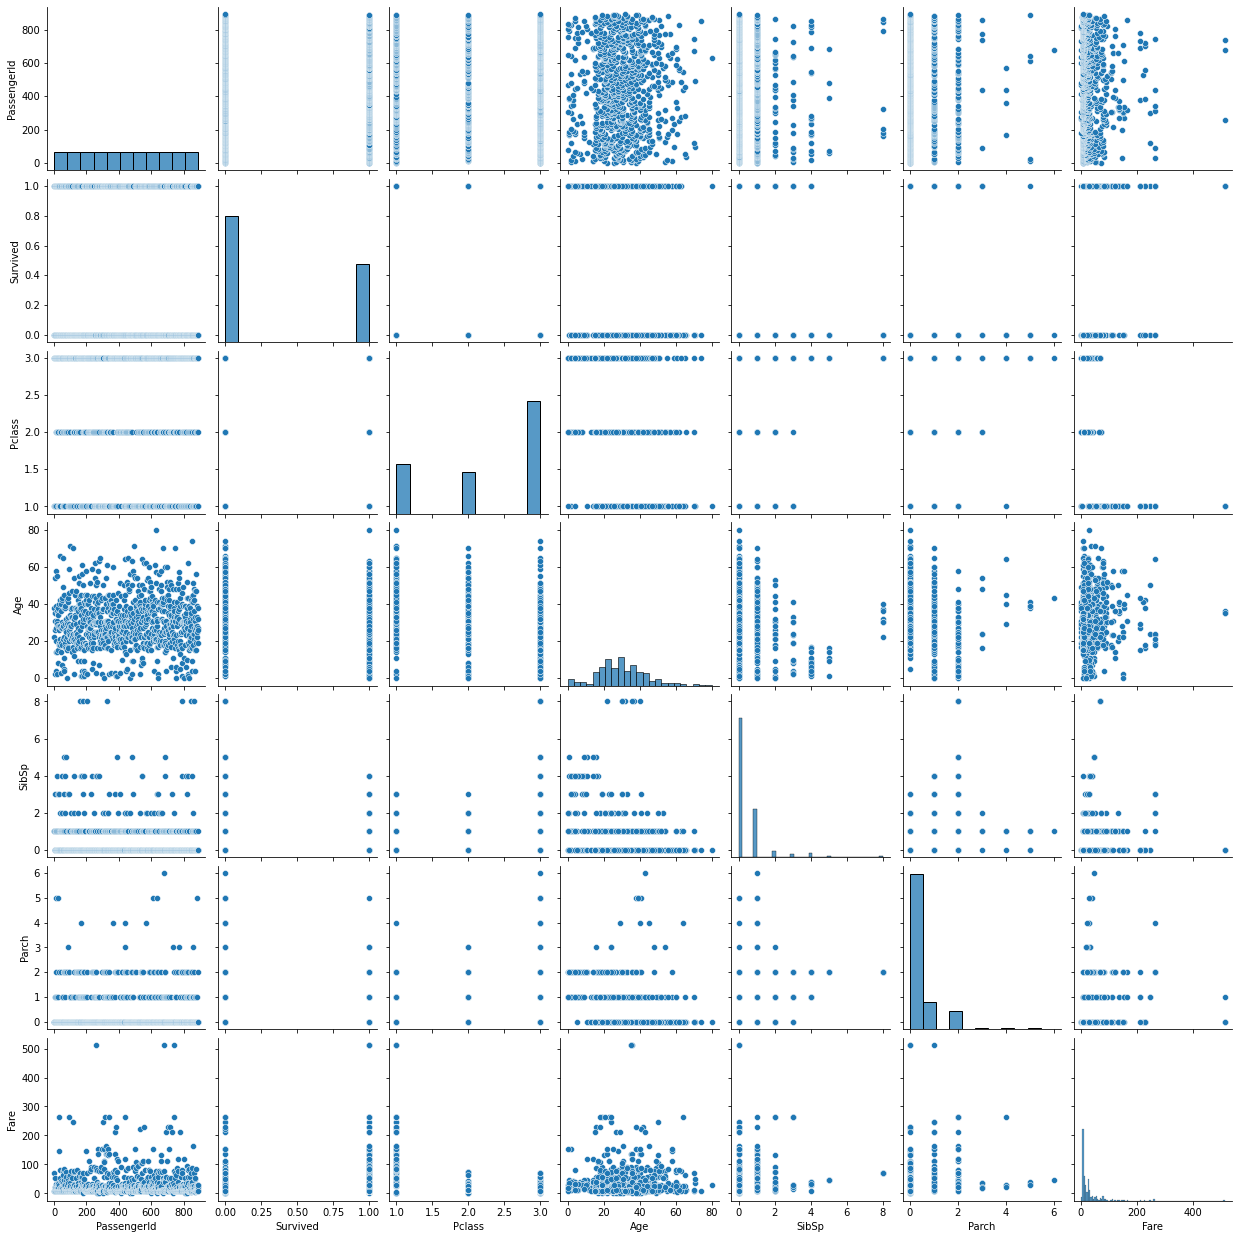

In [26]:
sns.pairplot(data=data)

C:\python 39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\python 39\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


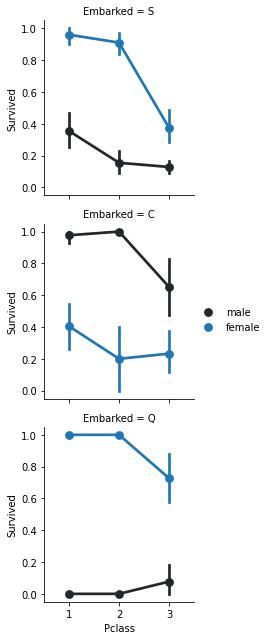

In [27]:
facegrid=sns.FacetGrid(data,row='Embarked')
facegrid.map(sns.pointplot,'Pclass','Survived','Sex')
facegrid.add_legend()

In [28]:
for dataset in data:
    data['relatives']=data['SibSp']+data['Parch']
    data.loc[data['relatives']>0,'not_alone']=0
    data.loc[data['relatives']==0,'not_alone']=1
    data['not_alone']=data['not_alone'].astype(int)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1


In [30]:
for dataset in data:
    data['Fare']=data['Fare'].astype(int)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1


In [32]:
data.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Embarked       object
relatives       int64
not_alone       int32
dtype: object

In [33]:
data1=[data]
for dataset in data1:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11)&(dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18)&(dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22)&(dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27)&(dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33)&(dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=66),'Age']=6
    dataset.loc[dataset['Age']>66,'Age']=7

In [34]:
data.Age.value_counts()

4    165
6    162
5    154
3    132
2    112
1     91
0     68
7      7
Name: Age, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5,1,0,PC 17599,71,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,7,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5,1,0,113803,53,S,1,0
4,5,0,3,"Allen, Mr. William Henry",1,5,0,0,373450,8,S,0,1


In [37]:
data['Embarked']=le.fit_transform(data['Embarked'])

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5,1,0,PC 17599,71,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,7,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5,1,0,113803,53,2,1,0
4,5,0,3,"Allen, Mr. William Henry",1,5,0,0,373450,8,2,0,1


In [39]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.027774,-0.057527,-0.001652,0.012668,0.013128,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.055905,-0.035322,0.081629,0.257482,-0.167675,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.298994,0.083081,0.018443,-0.550553,0.162098,0.065997,0.135207
Sex,0.042939,-0.543351,0.131900,1.000000,0.105026,-0.114631,-0.245489,-0.182331,0.108262,-0.200988,0.303646
Age,0.027774,-0.055905,-0.298994,0.105026,1.000000,-0.226595,-0.176212,0.080291,-0.029585,-0.242902,0.192447
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.226595,1.000000,0.414838,0.159506,0.068230,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.176212,0.414838,1.000000,0.216252,0.039798,0.783111,-0.583398
Fare,0.012668,0.257482,-0.550553,-0.182331,0.080291,0.159506,0.216252,1.000000,-0.224159,0.217052,-0.272355
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.029585,0.068230,0.039798,-0.224159,1.000000,0.066516,0.063532
relatives,-0.040143,0.016639,0.065997,-0.200988,-0.242902,0.890712,0.783111,0.217052,0.066516,1.000000,-0.690922


# Feature Engineering

In [40]:
x=data.loc[:,['Pclass','Sex','Age','Fare','Embarked','relatives','not_alone']]
y=data.loc[:,'Survived']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [42]:
x_train.shape

(712, 7)

In [43]:
x_test.shape

(179, 7)

# Model Prediction

In [44]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\python 39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [47]:
y_pred_prob=model.predict_proba(x_test)

In [48]:
y_pred_prob

array([[0.68587905, 0.31412095],
       [0.65075499, 0.34924501],
       [0.89376986, 0.10623014],
       [0.555049  , 0.444951  ],
       [0.89357081, 0.10642919],
       [0.68587905, 0.31412095],
       [0.36198582, 0.63801418],
       [0.37197541, 0.62802459],
       [0.76761157, 0.23238843],
       [0.72342859, 0.27657141],
       [0.9536595 , 0.0463405 ],
       [0.884523  , 0.115477  ],
       [0.85042614, 0.14957386],
       [0.45952446, 0.54047554],
       [0.30216722, 0.69783278],
       [0.7957144 , 0.2042856 ],
       [0.83235702, 0.16764298],
       [0.89003291, 0.10996709],
       [0.884523  , 0.115477  ],
       [0.92750466, 0.07249534],
       [0.65550043, 0.34449957],
       [0.77366769, 0.22633231],
       [0.93623086, 0.06376914],
       [0.56264596, 0.43735404],
       [0.4631618 , 0.5368382 ],
       [0.65313151, 0.34686849],
       [0.27714884, 0.72285116],
       [0.4182288 , 0.5817712 ],
       [0.83965408, 0.16034592],
       [0.09991451, 0.90008549],
       [0.

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
accuracy_score(y_test,y_pred)

0.7877094972067039

In [51]:
confusion_matrix(y_test,y_pred)

array([[85, 15],
       [23, 56]], dtype=int64)

In [52]:
# KNN Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_knn)

0.7206703910614525

In [55]:
confusion_matrix(y_test,y_pred_knn)

array([[85, 15],
       [35, 44]], dtype=int64)

In [56]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_dt)

0.7430167597765364

In [59]:
confusion_matrix(y_test,y_pred_dt)

array([[86, 14],
       [32, 47]], dtype=int64)

In [60]:
#Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred_rf)

0.7206703910614525

In [63]:
confusion_matrix(y_test,y_pred_rf)

array([[81, 19],
       [31, 48]], dtype=int64)

In [64]:
#support vector machine
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [65]:
y_pred_sv=svc.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred_sv)

0.6368715083798883

In [67]:
confusion_matrix(y_test,y_pred_sv)

array([[93,  7],
       [58, 21]], dtype=int64)

In [68]:
#logistic regression gives the best result